In [33]:
# import the library
# kernel must be [conda env:gl-env]
import graphlab as gl

In [34]:
import os
import urllib

##  Import data for the songs
songs = gl.SFrame.read_csv("../data/song_data.csv")

Finished parsing file C:\Users\nizzi\Documents\DataMiningProj\SMU-data-mining\data\song_data.csv

Parsing completed. Parsed 100 lines in 2.43172 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 637410 lines. Lines per second: 397750

Finished parsing file C:\Users\nizzi\Documents\DataMiningProj\SMU-data-mining\data\song_data.csv

Parsing completed. Parsed 1000000 lines in 1.94224 secs.

In [35]:
# Import the data for the plays per user per song
usage_data = gl.SFrame.read_csv("../data/kaggle_visible_evaluation_triplets.txt",
                                header=False,
                                delimiter='\t',
                                column_type_hints={'X3':int})

Finished parsing file C:\Users\nizzi\Documents\DataMiningProj\SMU-data-mining\data\kaggle_visible_evaluation_triplets.txt

Parsing completed. Parsed 100 lines in 1.62655 secs.

Finished parsing file C:\Users\nizzi\Documents\DataMiningProj\SMU-data-mining\data\kaggle_visible_evaluation_triplets.txt

Parsing completed. Parsed 1450933 lines in 1.68092 secs.

In [36]:
# Review the header of the song data
songs.head()

song_id,title,release,artist_name,year
SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze PresentsWinter Sessions ...,Der Mystic,0
SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor""Sinfonie ...",Berwald: Symphonies Nos.1/2/3/4 ...,David Montgomery,0
SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
SOJCFMH12A8C13B0C2,Mama_ mama can't you see? ...,March to cadence with theUS marines ...,The Sun Harbor's Chorus-Documentary Recordings ...,0


In [37]:
#Review data for the usage.   
usage_data

X1,X2,X3
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOBONKR12A58A7A7E0,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOEGIYH12A6D4FC0E3,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOFLJQZ12A6D4FADA6,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOHTKMO12AB01843B0,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SODQZCY12A6D4F9D11,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOXLOQG12AF72A2D55,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOUVUHC12A67020E3B,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOUQERE12A58A75633,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOIPJAX12A8C141A2D,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOEFCDJ12AB0185FA0,2


In [38]:
# Change data labels to be human readable 
usage_data.rename({'X1':'user', 'X2': 'song_id', 'X3': 'plays'})

user,song_id,plays
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOBONKR12A58A7A7E0,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOEGIYH12A6D4FC0E3,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOFLJQZ12A6D4FADA6,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOHTKMO12AB01843B0,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SODQZCY12A6D4F9D11,1
fd50c4007b68a3737fe052d5a4f78ce8aa117f3d ...,SOXLOQG12AF72A2D55,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOUVUHC12A67020E3B,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOUQERE12A58A75633,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOIPJAX12A8C141A2D,1
d7083f5e1d50c264277d624340edaaf3dc16095b ...,SOEFCDJ12AB0185FA0,2


#### Attempt to add in the Song Title

In [39]:
###Create the data to dataframes
ud_df = usage_data.to_dataframe()
song_df = songs.to_dataframe()

new_df = ud_df.merge(song_df, how='left', left_on='song_id', right_on='song_id')


In [40]:
new_df.head()

,user,song_id,plays,title,release,artist_name,year
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,You're The One,If There Was A Way,Dwight Yoakam,1990
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,0
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Tive Sim,Nova Bis-Cartola,Cartola,1974
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby,Lonnie Gordon,0
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,El Cuatrero,From Argentina To The World,Miguel Calo,2001


### Add in the categories then group by the categories

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Create the category function
def f(row):
    if row['plays'] <= 1:
        val = ' 0-1'
    elif row['plays'] <= 5:
        val = ' 2-5'
    elif row['plays'] <= 10:
        val =  ' 6-10'
    elif row['plays'] <= 50:
        val =  '11-50'
    elif row['plays'] <= 75:
        val =  '51-75'
    elif row['plays'] >75:
        val =  'Greater than 75'
    return val



In [42]:
#Apply the category function 
new_df['category'] = new_df.apply(f, axis=1)

#Confirm the new category added
new_df.head()

,user,song_id,plays,title,release,artist_name,year,category
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,You're The One,If There Was A Way,Dwight Yoakam,1990,0-1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,0,0-1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Tive Sim,Nova Bis-Cartola,Cartola,1974,0-1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby,Lonnie Gordon,0,0-1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,El Cuatrero,From Argentina To The World,Miguel Calo,2001,0-1


In [43]:
#Group by categories

pie_chart = new_df.groupby(by=['category'])[['plays']].sum().reset_index()

pie_chart.head()

,category,plays
0,0-1,862354
1,2-5,1340667
2,6-10,762140
3,11-50,1388312
4,51-75,163005


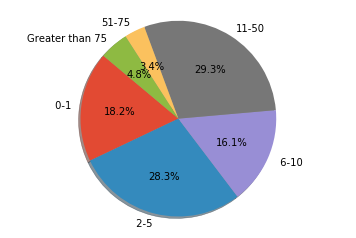

In [44]:
#Plot

plt.pie(pie_chart['plays'], labels=pie_chart['category'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### create a new df with user, artist, and plays

In [45]:
df_artist = new_df.groupby(by=['user','artist_name','category'])[['plays']].sum().reset_index()

df_artist.head()

,user,artist_name,category,plays
0,00007a02388c208ea7176479f6ae06f8224355b3,Dredg,2-5,3
1,00007a02388c208ea7176479f6ae06f8224355b3,Local H,0-1,1
2,00007a02388c208ea7176479f6ae06f8224355b3,M83,2-5,2
3,00007a02388c208ea7176479f6ae06f8224355b3,No Doubt,0-1,1
4,00007a02388c208ea7176479f6ae06f8224355b3,Pantera,0-1,1


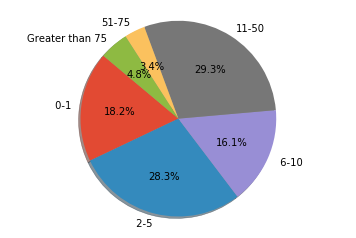

In [46]:
#Group by categories

art_pc = df_artist.groupby(by=['category'])[['plays']].sum().reset_index()

art_pc.head()
plt.pie(art_pc['plays'], labels=art_pc['category'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [47]:
### Look at the play groupings for 

### Convert the df back to sframe

In [48]:
###Add the data back to SFrame (both song and artist)

combo_songs = gl.SFrame(new_df)

artist = gl.SFrame(df_artist)

In [ ]:
###Confirm both Sframea are ok

combo_songs.head

artist.head

<bound method SFrame.head of Columns:
	user	str
	artist_name	str
	category	str
	plays	int

Rows: 1202592

Data:
+-------------------------------+---------------------+----------+-------+
|              user             |     artist_name     | category | plays |
+-------------------------------+---------------------+----------+-------+
| 00007a02388c208ea7176479f6... |        Dredg        |    2-5   |   3   |
| 00007a02388c208ea7176479f6... |       Local H       |    0-1   |   1   |
| 00007a02388c208ea7176479f6... |         M83         |    2-5   |   2   |
| 00007a02388c208ea7176479f6... |       No Doubt      |    0-1   |   1   |
| 00007a02388c208ea7176479f6... |       Pantera       |    0-1   |   1   |
| 00007a02388c208ea7176479f6... |      Sam Sparro     |    0-1   |   2   |
| 00007a02388c208ea7176479f6... | Stone Temple Pilots |    0-1   |   1   |
| 00007a02388c208ea7176479f6... | Stone Temple Pilots |    2-5   |   2   |
| 00014a76ed063e1a749171a253... | Angels and Airwaves |    2-5 

In [ ]:
#recommendation model based on the song ID

model = gl.recommender.create(usage_data, user_id = "user", item_id="song_id", target = "plays")
results = model.recommend(users=None, k=5)
model.save("my_model")

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1450933 observations with 110000 users and 163206 items.

Data prepared in: 2.39452s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 181366 / 1450933 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 78.061                                   |

| 5       | 0.0488281         | 59.221                                   |

| 6       | 0.0244141         | 74.0561                                  |

| 7       | 0.012207          | 84.3643                                  |

| 8       | 0.00610352        | 91.5048                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0488281         | 59.221                                   |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 97.4848           | 7.05166               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.04s        | DIVERGED          | DIVERGED              | 0.0488281   |

| RESET   | 3.35s        | 97.4848           | 7.05166               |             |

| 1       | 4.72s        | 89.8044           | 7.11317               | 0.0244141   |

| 2       | 6.04s        | 78.0381           | 6.72867               | 0.0145167   |

| 3       | 7.37s        | 64.8719           | 5.8166                | 0.0107102   |

| 4       | 8.72s        | 55.4398           | 5.11488               | 0.00863167  |

| 5       | 10.23s       | 48.3429           | 4.54126               | 0.00730151  |

| 6       | 11.62s       | 43.483            | 4.13148               | 0.00636835  |

| 7       | 12.96s       | 40.014            | 3.83434               | 0.00567305  |

| 8       | 14.31s       | 36.8771           | 3.53961               | 0.00513242  |

| 9       | 15.66s       | 34.3987           | 3.29905               | 0.00469849  |

| 10      | 17.15s       | 32.3198           | 3.09204               | 0.0043415   |

| 11      | 18.50s       | 30.464            | 2.89674               | 0.00404199  |

| 12      | 19.83s       | 29.2308           | 2.78745               | 0.00378664  |

| 13      | 21.18s       | 28.1341           | 2.69381               | 0.00356601  |

| 14      | 22.56s       | 26.9873           | 2.56381               | 0.00337322  |

| 15      | 24.00s       | 26.0846           | 2.48449               | 0.00320311  |

| 16      | 25.58s       | 24.971            | 2.34553               | 0.00305176  |

| 17      | 26.97s       | 24.3151           | 2.29116               | 0.00291611  |

| 18      | 28.32s       | 23.6699           | 2.22695               | 0.00279374  |

| 19      | 29.77s       | 22.9738           | 2.1524                | 0.00268272  |

| 20      | 31.19s       | 22.5809           | 2.13989               | 0.00258147  |

| 21      | 32.53s       | 21.9037           | 2.05309               | 0.00248872  |

| 22      | 33.87s       | 21.4913           | 2.03106               | 0.00240338  |

| 23      | 35.21s       | 20.8687           | 1.94316               | 0.00232458  |

| 24      | 36.59s       | 20.4121           | 1.89812               | 0.00225155  |

| 25      | 38.11s       | 20.1263           | 1.89414               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 19.4968

Final training RMSE: 1.74715

recommendations finished on 1000/110000 queries. users per second: 222.964

recommendations finished on 2000/110000 queries. users per second: 222.29

recommendations finished on 3000/110000 queries. users per second: 222.008

recommendations finished on 4000/110000 queries. users per second: 222.858

recommendations finished on 5000/110000 queries. users per second: 222.302

recommendations finished on 6000/110000 queries. users per second: 222.131

recommendations finished on 7000/110000 queries. users per second: 218.516

recommendations finished on 8000/110000 queries. users per second: 208.49

recommendations finished on 9000/110000 queries. users per second: 205.02

recommendations finished on 10000/110000 queries. users per second: 196.531

recommendations finished on 11000/110000 queries. users per second: 194.438

recommendations finished on 12000/110000 queries. users per second: 196.241

recommendations finished on 13000/110000 queries. users per second: 198.012

recommendations finished on 14000/110000 queries. users per second: 199.378

recommendations finished on 15000/110000 queries. users per second: 200.708

recommendations finished on 16000/110000 queries. users per second: 202.132

recommendations finished on 17000/110000 queries. users per second: 203.368

recommendations finished on 18000/110000 queries. users per second: 204.242

recommendations finished on 19000/110000 queries. users per second: 205.165

recommendations finished on 20000/110000 queries. users per second: 205.91

recommendations finished on 21000/110000 queries. users per second: 206.63

recommendations finished on 22000/110000 queries. users per second: 207.296

recommendations finished on 23000/110000 queries. users per second: 207.913

recommendations finished on 24000/110000 queries. users per second: 208.412

recommendations finished on 25000/110000 queries. users per second: 208.918

recommendations finished on 26000/110000 queries. users per second: 209.353

recommendations finished on 27000/110000 queries. users per second: 209.937

recommendations finished on 28000/110000 queries. users per second: 210.28

recommendations finished on 29000/110000 queries. users per second: 210.534

recommendations finished on 30000/110000 queries. users per second: 210.782

recommendations finished on 31000/110000 queries. users per second: 211.177

recommendations finished on 32000/110000 queries. users per second: 211.568

recommendations finished on 33000/110000 queries. users per second: 211.926

recommendations finished on 34000/110000 queries. users per second: 212.05

recommendations finished on 35000/110000 queries. users per second: 212.324

recommendations finished on 36000/110000 queries. users per second: 212.356

recommendations finished on 37000/110000 queries. users per second: 212.561

recommendations finished on 38000/110000 queries. users per second: 212.765

recommendations finished on 39000/110000 queries. users per second: 213.004

recommendations finished on 40000/110000 queries. users per second: 213.212

recommendations finished on 41000/110000 queries. users per second: 213.349

recommendations finished on 42000/110000 queries. users per second: 213.46

recommendations finished on 43000/110000 queries. users per second: 213.531

recommendations finished on 44000/110000 queries. users per second: 213.744

recommendations finished on 45000/110000 queries. users per second: 213.9

recommendations finished on 46000/110000 queries. users per second: 214.024

recommendations finished on 47000/110000 queries. users per second: 214.087

recommendations finished on 48000/110000 queries. users per second: 214.167

recommendations finished on 49000/110000 queries. users per second: 214.126

recommendations finished on 50000/110000 queries. users per second: 214.344

recommendations finished on 51000/110000 queries. users per second: 214.414

recommendations finished on 52000/110000 queries. users per second: 214.589

recommendations finished on 53000/110000 queries. users per second: 214.743

recommendations finished on 54000/110000 queries. users per second: 214.824

recommendations finished on 55000/110000 queries. users per second: 214.957

recommendations finished on 56000/110000 queries. users per second: 215.082

recommendations finished on 57000/110000 queries. users per second: 215.256

recommendations finished on 58000/110000 queries. users per second: 215.376

recommendations finished on 59000/110000 queries. users per second: 215.506

recommendations finished on 60000/110000 queries. users per second: 215.704

recommendations finished on 61000/110000 queries. users per second: 215.809

recommendations finished on 62000/110000 queries. users per second: 215.835

In [ ]:
results # the recommendation output

In [ ]:
results[300:310]

Above shows the top 5 ratings for each user

In [ ]:
usage_data.head()

In [ ]:
results

In [ ]:
item_item = gl.recommender.item_similarity_recommender.create(usage_data,
                                                             user_id="user",
                                                             item_id="song_id",
                                                             target="plays",
                                                             only_top_k=3,
                                                             similarity_type="cosine")

results = item_item.get_similar_items(k=3)
results.head

In [ ]:
#Break the data - train test - by user:  80% to train.  20% to test.   limit to 100 user for the real time for this example
train, test = gl.recommender.util.random_split_by_user(usage_data,
                                                      user_id="user", item_id="song_id",
                                                      max_num_users=100, item_test_proportion=0.2)

In [ ]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')

item_item = gl.recommender.item_similarity_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song_id",
                                                             target="plays",
                                                             only_top_k=5,
                                                             similarity_type="cosine")

rmse_results = item_item.evaluate(test)


In [ ]:
#print rmse_results ('rmse_by_item')
print rmse_results.viewkeys()


In [ ]:
rmse_results['rmse_overall']

In [ ]:
rmse_results['rmse_by_user']

In [ ]:
rmse_results['rmse_by_item']

In [ ]:
#look at distribution of values from the rmse

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_item']['rmse']

plt.hist(rmsevals, bins=20)
plt.title('RMSE by Song')
plt.show()

In [ ]:
#look at distribution of values from the rmse

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_user']['rmse']
rmsevals = rmsevals[rmse_results['rmse_by_user']['count']>10]


plt.hist(rmsevals, bins=20)
plt.title('RMSE by User')
plt.show()

In [ ]:
rmse_results['rmse_by_user']

In [ ]:
#looking at recall and precision
rmse_results['precision_recall_by_user']

In [ ]:
#do the aggregate

import graphlab.aggregate as agg

# we will be using these aggregations
agg_list = [ agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group(group the restuls by 'k' which is the cutoff)
# the cutoff is the number of top items to look for 
# https://dato.com/products/create/docs/generated/graphlab.recommender.util.precision_recall_by_user.html#

rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)

## Cross Validated Collaborative Filtering

In [ ]:
recl = gl.recommender.ranking_factorization_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song_id",
                                                             target="plays")

rmse_results = recl.evaluate(test)

In [ ]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall')])
# actually made it worse

In [ ]:
recl = gl.recommender.ranking_factorization_recommender.create(train,
                                                             user_id="user",
                                                             item_id="song_id",
                                                             target="plays",
                                                              num_factors=16,  #override default
                                                              regularization=1e-02,
                                                              linear_regularization = 1e-3)

rmse_results = recl.evaluate(test)

In [ ]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall')])

## Is this better than the item item matrix

In [ ]:
comparison = gl.recommender.util.compare_models(test, [item_item, recl])

In [ ]:
comparisonstruct = gl.compare(test, [item_item, recl])

In [ ]:
gl.show_comparison(comparisonstruct,[item_item, recl])

User item_item matrix for anything more than 1

## Parameters, Parameters
# RUNNING FOR 5 MODELS IS TIME CONSUMING.   TIME 

In [ ]:
#Run moving the # of models to 3 for time.

params = {'user_id': 'user',
         'item_id': 'song_id',
         'target': 'plays',
         'num_factors': [8, 12, 16, 24, 32],
         'regularization': [0.001] ,
         'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
                                      gl.recommender.ranking_factorization_recommender.create,
                                      params,
                                      max_models=5,
                                      environment=None)

# also note this evaluator also support sklearn
# https://dato.com/products/create/docs/generated/graphlab.toolkits.model_parameter_search.create.html
# None means it is locally hosted

In [ ]:
job.get_status()

In [ ]:
job_result = job.get_results()

job_result.head()

In [ ]:
bst_prms = job.get_best_params()
bst_prms
# the restuls show 4 neg sample and 24 factors (his was 12)

In [ ]:
models = job.get_models()
models

In [ ]:
comparisonstruct = gl.compare(test,models)
gl.show_comparison(comparisonstruct,models)

In [ ]:
models[1]

most are the similar.   when cut off less than 10 - about the same.   
can do machine learning.  see the code below for the function that is your friend. - supports sklearn

many features for the item

Some referencence
https://chrisalbon.com/python/matplotlib_pie_chart.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
    